# Лабораторная работа 1

## Задание 3.1.28 

m = 4
d = [5.55546e-06 9.82988e-04 1.23874e-02 3.65618e-02 2.87233e-02]
delta(x^m) = 0.036561836924562975
delta(b^m) = 0.003571428571428622
cond(A) = 126107266491.2072
0.036561836924562975 <= 450383094.6114607
delta(x^m) <= cond(A) * delta(b^m)


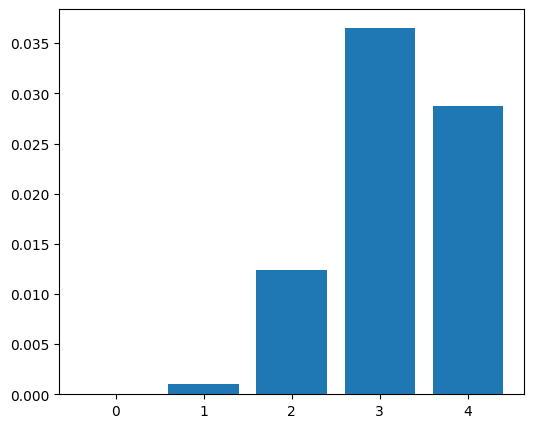

In [39]:
import numpy as np  # type: ignore
import matplotlib.pyplot as plt  # type: ignore


N, n = 28, 5
C, b = np.zeros((n, n), dtype=float), np.full(n, fill_value=N, dtype=float)

for i in range(n):
    for j in range(n):
        C[i, j] = 0.1 * N * (i + 1) * (j + 1)
        
A = 500 / (8 * C - 5) ** 2

x = np.linalg.solve(A, b)

cond_value = np.linalg.cond(np.abs(A), p=np.inf)
delta = 0.1

x_modified = np.empty((n, n))
for i in range(n):
    b_modified = b.copy()
    b_modified[i] += delta
    x_modified[i] = np.linalg.solve(A, b_modified)
d = np.array([np.linalg.norm(x - x_i, ord=np.inf) / np.linalg.norm(x, ord=np.inf)
              for x_i in x_modified])

plt.figure(figsize=(6, 5))
plt.bar(range(n), d)
plt.xlabel('')

d_argmax = np.argmax(d)
b_modified = b.copy()
b_modified[d_argmax] += delta


with np.printoptions(precision=5):
    rel_delta = (np.linalg.norm(b_modified - b, ord=np.inf)
                 / np.linalg.norm(b, ord=np.inf))
    print(f'm = {d_argmax + 1}')
    print(f'd = {d}')
    print(f'delta(x^m) = {d[d_argmax]}')
    print(f'delta(b^m) = {rel_delta}')
    print(f'cond(A) = {cond_value}')
    cmp_sign = '<=' if d[d_argmax] <= rel_delta * cond_value else '>'
    print(f'{d[d_argmax]} {cmp_sign} {rel_delta * cond_value}')
    print(f'delta(x^m) {cmp_sign} cond(A) * delta(b^m)')

## Задание 3.2

i, j = (0, 4)
delta(x^h) = 1.0137504431483713
delta(A^h) = 0.04525109116788567
cond(A) = 126107266491.2072
1.0137504431483713 <= 5706491412.926471
delta(x^h) <= cond(A) * delta(A^h)


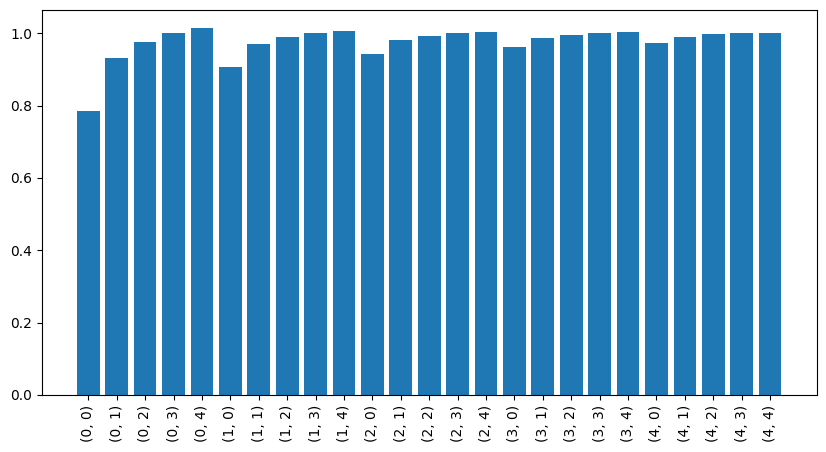

In [11]:
import numpy as np
import matplotlib.pyplot as plt

N, n = 28, 5

C = np.zeros((n, n), dtype=float)
for i in range(n):
    for j in range(n):
        C[i, j] = 0.1 * N * (i + 1) * (j + 1)

A = 500 / (8 * C - 5) ** 2
b = np.full(n, fill_value=N, dtype=float)

x = np.linalg.solve(A, b)
cond_value = np.linalg.cond(A, p=np.inf)

delta = 0.1
x_modified = {}
for i in range(n):
    for j in range(n):
        A_modified = A.copy()
        A_modified[i, j] += delta
        x_modified[(i, j)] = np.linalg.solve(A_modified, b)
        
d = {key: np.linalg.norm(x - x_i, ord=np.inf) / np.linalg.norm(x, ord=np.inf)
     for key, x_i in x_modified.items()}

plt.figure(figsize=(10, 5))
plt.bar([str(el) for el in d.keys()], d.values())
plt.xlabel('')
plt.xticks(rotation=90)

d_i, d_j = max(d, key=d.get)  # Получаем индексы максимальной погрешности
A_modified = A.copy()
A_modified[d_i, d_j] += delta
rel_delta = (np.linalg.norm(A_modified - A, ord=np.inf)
             / np.linalg.norm(A, ord=np.inf))
cmp_sign = '<=' if d[(d_i, d_j)] <= rel_delta * cond_value else '>'

print(f'i, j = {d_i, d_j}')
print(f'delta(x^h) = {d[(d_i, d_j)]}')
print(f'delta(A^h) = {rel_delta}')
print(f'cond(A) = {cond_value}')
print(f'{d[(d_i, d_j)]} {cmp_sign} {rel_delta * cond_value}')
print(f'delta(x^h) {cmp_sign} cond(A) * delta(A^h)')


## Задание 3.10.6

In [43]:
import numpy as np

n = 30

# Инициализация векторов для коэффициентов прогона
alpha = np.zeros(n-1)
beta = np.zeros(n)

# Инициализация массивов для матрицы A и вектора b
A = np.zeros((n, n))
b = np.zeros(n)

# Заполнение матрицы A и вектора b
for i in range(n):
    b[i] = (i+1) * np.exp(22/(i+1))
    A[i, i] = 100
    if i < n-1:
        A[i, i+1] = 47
        A[i+1, i] = 47
    if i < n-20:
        A[i, i+20] = 1
        A[i+20, i] = 1

# Прямой ход (нахождение прогоночных коэффициентов)
alpha[0] = -A[0, 1] / A[0, 0]
beta[0] = b[0] / A[0, 0]
for i in range(1, n-1):
    alpha[i] = -A[i, i+1] / (A[i, i] + A[i, i-1] * alpha[i-1])
    beta[i] = (b[i] - A[i, i-1] * beta[i-1]) / (A[i, i] + A[i, i-1] * alpha[i-1])

# Обратный ход (нахождение решения x)
x = np.zeros(n)
x[n-1] = (b[n-1] - A[n-1, n-2] * beta[n-2]) / (A[n-1, n-1] + A[n-1, n-2] * alpha[n-2])
for i in range(n-2, -1, -1):
    x[i] = alpha[i] * x[i+1] + beta[i]

print("Решение x:", x)


Решение x: [ 5.34580856e+07 -3.74658662e+07  2.62590712e+07 -1.84044004e+07
  1.28992483e+07 -9.04080017e+06  6.33650169e+06 -4.44111486e+06
  3.11268154e+06 -2.18160960e+06  1.52904295e+06 -1.07167153e+06
  7.51110841e+05 -5.26435141e+05  3.68965360e+05 -2.58596157e+05
  1.81240576e+05 -1.27020770e+05  8.90176816e+04 -6.23772657e+04
  4.37011835e+04 -3.06027019e+04  2.14122206e+04 -1.49539406e+04
  1.04059515e+04 -7.18509923e+03  4.88278302e+03 -3.20250322e+03
  1.93236067e+03 -9.07584910e+02]


In [44]:
# Проверка решения
b_calculated = np.dot(A, x)

# Вычисление относительной ошибки
relative_error = np.linalg.norm(b - b_calculated) / np.linalg.norm(b)

print("Проверка решения:")
print("Вектор b (заданный):", b)
print("Вектор b (вычисленный):", b_calculated)
print("Относительная ошибка:", relative_error)


Проверка решения:
Вектор b (заданный): [3.58491285e+09 1.19748283e+05 4.59142458e+03 9.78767729e+02
 4.07254343e+02 2.34727704e+02 1.62189806e+02 1.25141055e+02
 1.03717310e+02 9.02501350e+01 8.12796171e+01 7.50564114e+01
 7.06160213e+01 6.73892764e+01 6.50214274e+01 6.32812276e+01
 6.20121908e+01 6.11050174e+01 6.04812691e+01 6.00833205e+01
 5.98679609e+01 5.98022002e+01 5.98604461e+01 6.00225603e+01
 6.02724927e+01 6.05973028e+01 6.09864483e+01 6.14312581e+01
 6.19245383e+01 6.24602725e+01]
Вектор b (вычисленный): [ 3.58495655e+09  8.91455816e+04  2.60036452e+04 -1.39751729e+04
  1.08132058e+04 -6.95037153e+03  5.04497282e+03 -3.07736216e+03
  2.03607798e+03 -8.17334775e+02  8.12796171e+01  7.50564114e+01
  7.06160213e+01  6.73892764e+01  6.50214274e+01  6.32812276e+01
  6.20121908e+01  6.11050174e+01  6.04812691e+01  6.00833205e+01
  5.34581455e+07 -3.74658064e+07  2.62591311e+07 -1.84043404e+07
  1.28993086e+07 -9.04073957e+06  6.33656267e+06 -4.44105343e+06
  3.11274346e+06 -2.181